In [1]:
import numpy as np
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from py_pol.mueller import Mueller

from py_pol import degrees

import matplotlib.pyplot as plt

from py_aocg.SLM_system import cargar_Jones_SLM, SLM_system_field
from py_aocg.ifta.algorithms import distances_scalar, distances_vector

py_aocg
number of processors: 8
total memory        : 7.5 Gb
available memory    : 45 %
max frequency       : 4000 GHz
number of processors: 8
total memory        : 7.5 Gb
available memory    : 45 %
max frequency       : 4000 GHz


## Cargar Matrices de polarización de Holoeye

In [2]:
S_incident=Jones_vector('incident')
S_incident.linear_light(azimuth=45*degrees)

incident = 
[+0.707+0.000j ]   
[+0.707+0.000j ]   

In [3]:
Jslm=cargar_Jones_SLM(type="Jones")

In [4]:
type(Jslm), Jslm.shape

(py_pol.jones_matrix.Jones_matrix, [256])

## Ejemplo de sistema sin polarizadores

In [25]:
# interesantes 
angles=np.array((45*degrees,45*degrees,45*degrees, 135*degrees))


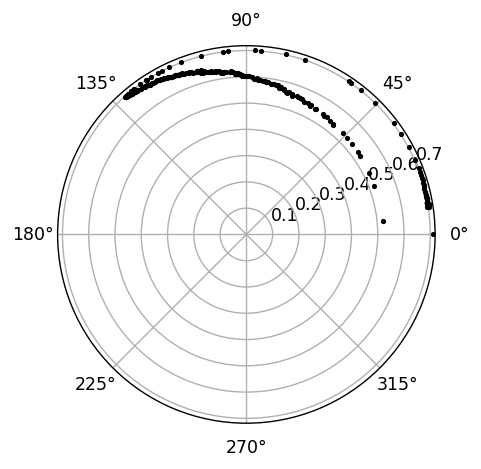

In [106]:
S_incident=Jones_vector('incident')
S_incident.linear_light(azimuth=90*degrees)
#S_incident.circular_light(kind='r')

angles=np.array((135*degrees, 0*degrees, np.nan, np.nan))
# angles=np.array((45*degrees,45*degrees,45*degrees, 45*degrees))
angles=np.array(( np.nan, np.nan, np.nan, np.nan))


u_fab_amplitude, u_fab_phase, fields=SLM_system_field(angles, Jslm, E0=S_incident)

plt.polar(u_fab_phase, u_fab_amplitude, 'k.', ms=4);

fields = fields[::5]
fields = fields.normalize()

In [107]:
fields.shape

[52]

## Rejilla con puntos

In [108]:
size_x_DOE, size_y_DOE = 11,12

doe_real = np.linspace(-1,1, size_x_DOE)
doe_imag = np.linspace(-1,1, size_y_DOE)

DOE_real, DOE_imag = np.meshgrid(doe_real, doe_imag)

DOE = DOE_real + 1j*DOE_imag

## Captura de campos fabricables

In [109]:
fields=fields.normalize(kind='amplitude')

In [110]:
Ex,Ey=fields.parameters.components()

In [111]:
Esx_posible=Ex
Esy_posible=Ey

In [112]:
Esx_posible_real = Ex.real
Esx_posible_imag = Ex.imag
Esy_posible_real = Ey.real
Esy_posible_imag = Ey.imag



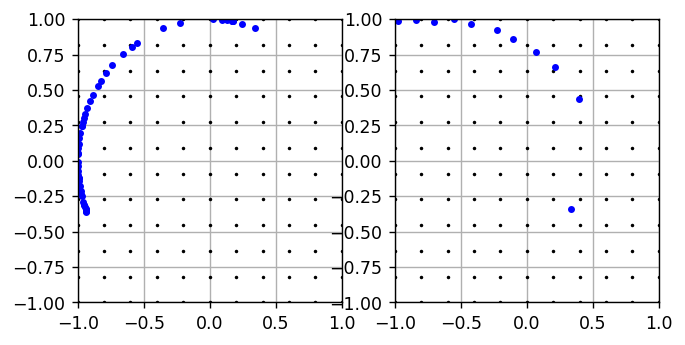

In [113]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(DOE_real, DOE_imag, 'k.', ms=2)
plt.plot(Esx_posible_real, Esx_posible_imag, 'b.')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(DOE_real, DOE_imag, 'k.', ms=2)
plt.plot(Esy_posible_real, Esy_posible_imag, 'b.')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)


## Distancias entre campo vectorial y fabricable
Estamos en modo escalar. Queremos calcular las distancias entre un campo complejo [$A_x(x,y)e^{i \phi_x(x,y)}$,  $A_y(x,y)e^{i \phi_y(x,y)}$] -y unos elementos fabricables [$A_xf(x,y)e^{i \phi_xf(x,y)}$, $A_y f(x,y)e^{i \phi_yf(x,y)}$]. Pasamos a campos Er y Ei pues es más sencillo medir distancias

### Checking

In [114]:
DOEx = np.vstack((Esx_posible, Esx_posible))
DOEy = np.vstack((Esy_posible, Esy_posible))
DOEx.shape

(2, 52)

In [115]:
%%time
DOEx_new, DOEy_new, i_positions, distances=distances_vector(DOEx, DOEy, Esx_posible, Esy_posible)

CPU times: user 2.27 ms, sys: 407 µs, total: 2.67 ms
Wall time: 1.55 ms


In [116]:
distances.mean()

0.0

In [117]:
i_positions

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51]])

### example

In [118]:
%%time
DOEx_new, DOEy_new, i_positions, distances=distances_vector(DOE, DOE, Esx_posible, Esy_posible)

CPU times: user 2.51 ms, sys: 3.79 ms, total: 6.3 ms
Wall time: 3.86 ms


In [119]:
distances.mean()

1.2780323198120278

In [120]:
i_positions

array([[31, 31, 35, 51, 51, 51, 51, 51, 51, 51, 51],
       [31, 35, 35, 51, 51, 51, 51, 51, 51, 51, 51],
       [35, 35, 39, 51, 51, 51, 51, 51, 51, 51, 51],
       [35, 39, 43, 51, 51, 51, 51, 51, 51, 51, 51],
       [36, 39, 43, 47, 51, 51, 51, 51, 51, 51, 51],
       [39, 39, 43, 47, 51, 51, 51, 51, 51, 51, 51],
       [39, 41, 43, 47, 49, 50, 51, 51, 51, 51, 51],
       [39, 43, 43, 47, 48, 50, 50, 51, 51, 51, 51],
       [41, 43, 45, 47, 48, 50, 50, 50, 51, 51, 51],
       [41, 43, 45, 47, 48, 49, 50, 50, 50, 51, 51],
       [42, 43, 45, 47, 48, 49, 50, 50, 50, 50, 50],
       [42, 44, 45, 47, 48, 49, 50, 50, 50, 50, 50]])